# **PREDICTION USING DECISION TREE ALGORITHM**

###  **TASK 6**

**Author: Sneha Ganesh**



### **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix, classification_report

**Mounting to google drive as the file is saved in the drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Import the IRIS dataset from the drive**


In [ ]:
iris=pd.read_csv("/content/drive/My Drive/Iris - Iris.csv")

In [ ]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


The Iris dataset has **150** rows and **6** columns as in there are **4 important features** which would be considered for model building and one target variable and one column which is the **ID** column, that won't play as an important feature in the model building as it isn't much significant and would be **dropped** later in the process.

In [ ]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


The Describe function in pandas shows the descriptive statistics of all the continuous columns i.e. the numerical columns. It shows the mean, median(2nd Quartile), 1st quartile, 3rd Quartile, min value, max value, standard deviation, count.

In [ ]:
iris.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

The Species column is the target variable which has three values namely Setosa, Virginica and Vesicolor, since it has more than 2 values it is not a binary classifier but it is a multiclass classification problem. The value_counts function shows that the classes are evenly distibuted.

In [ ]:
setosa=iris["Species"][iris["Species"]== "Iris-setosa"]
print("Setosa Percentage = ",str((setosa.shape[0]/iris["Species"].shape[0]*100)),"%")
virginica=iris["Species"][iris["Species"]== "Iris-virginica"]
print("Virginica Percentage = ",str((setosa.shape[0]/iris["Species"].shape[0]*100)),"%")
versicolor=iris["Species"][iris["Species"]== "Iris-versicolor"]
print("Versicolor Percentage = ",str((setosa.shape[0]/iris["Species"].shape[0]*100)),"%")

Setosa Percentage =  33.33333333333333 %
Virginica Percentage =  33.33333333333333 %
Versicolor Percentage =  33.33333333333333 %


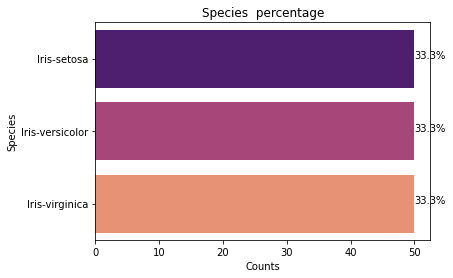

In [ ]:
total = len(iris['Species'])
ax = sns.countplot(y="Species", data=iris, palette="magma")
ax.set_title('Species  percentage')
plt.xlabel('Counts')

total = len(iris['Species'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

From the above value counts its seen that the target values are evenly distributed, so the classes are not imbalanced and since the classes are not imbalanced there won't a problem for the model to learn from each classes.

In [ ]:
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

The data is clean and there are no NaN values

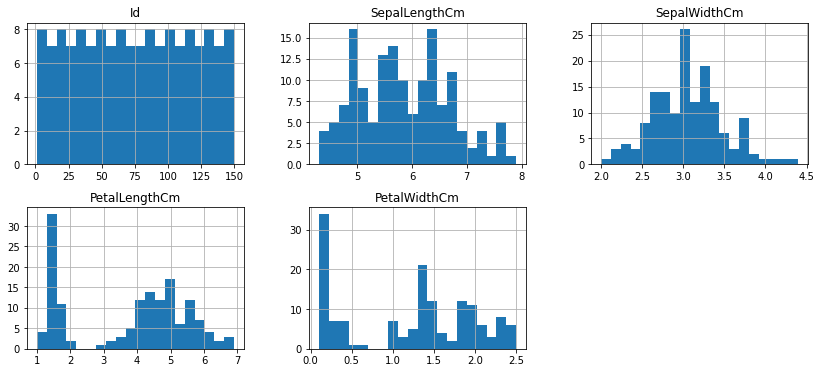

In [ ]:
iris.hist(bins = 20, layout = (2,3), figsize=(14, 6))
plt.show()

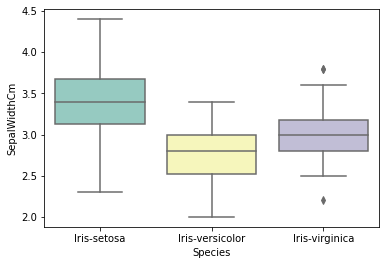

In [ ]:
sns.boxplot(x = iris.Species, y = iris.SepalWidthCm,  palette="Set3")
plt.show()

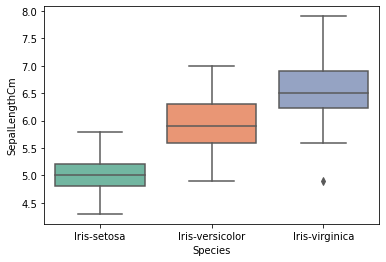

In [ ]:
sns.boxplot(x = iris.Species, y = iris.SepalLengthCm, palette="Set2")
plt.show()

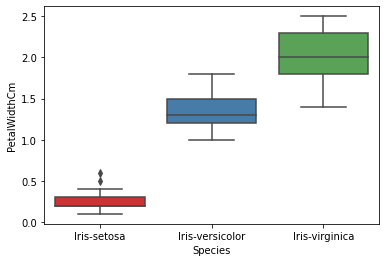

In [ ]:
sns.boxplot(x = iris.Species, y = iris.PetalWidthCm, palette="Set1")
plt.show()

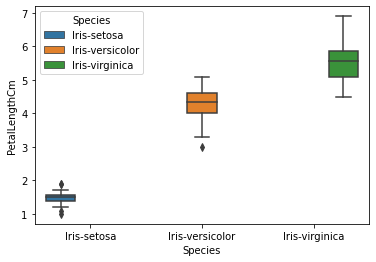

In [ ]:
sns.boxplot(x = iris.Species, y = iris.PetalLengthCm, hue=iris.Species)
plt.show()

Histogram for each flower

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated

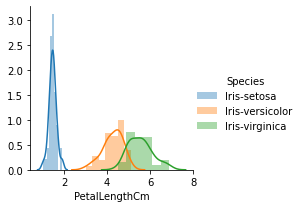

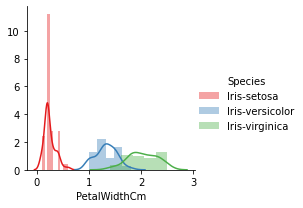

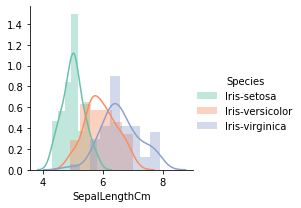

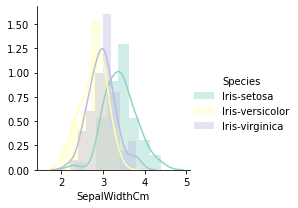

In [ ]:
sns.FacetGrid(iris,hue="Species",size=3).map(sns.distplot,"PetalLengthCm").add_legend()
sns.FacetGrid(iris,hue="Species",size=3, palette="Set1").map(sns.distplot,"PetalWidthCm").add_legend()
sns.FacetGrid(iris,hue="Species",size=3, palette="Set2").map(sns.distplot,"SepalLengthCm").add_legend() 
sns.FacetGrid(iris,hue="Species",size=3,palette="Set3").map(sns.distplot,"SepalWidthCm").add_legend()
plt.show()

From the above visualizations, it can be interpreted that iris-setosa can be seperated using petal length.

In [ ]:
iris.drop("Id",axis=1,inplace=True)
target_names=iris.Species.unique()

Convert the categorical target variable to continuous variable as the model requires continuous variables to train. We can use LabelEncoder or OneHotEncoding to convert the categorical variable to continuous variable.

In [ ]:
label_encoder=preprocessing.LabelEncoder()
iris['Species']=label_encoder.fit_transform(iris['Species'])


In [ ]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris.Species.value_counts()
# 2 - Iris-setosa        
# 1 - Iris-virginica     
# 0 - Iris-versicolor

2    50
1    50
0    50
Name: Species, dtype: int64

In [ ]:
X = iris.drop('Species', axis = 1)
Y = iris['Species']

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
feature_names=X.columns

In [ ]:
import graphviz 

gd = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                      class_names=target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
dt_iris = graphviz.Source(gd)  

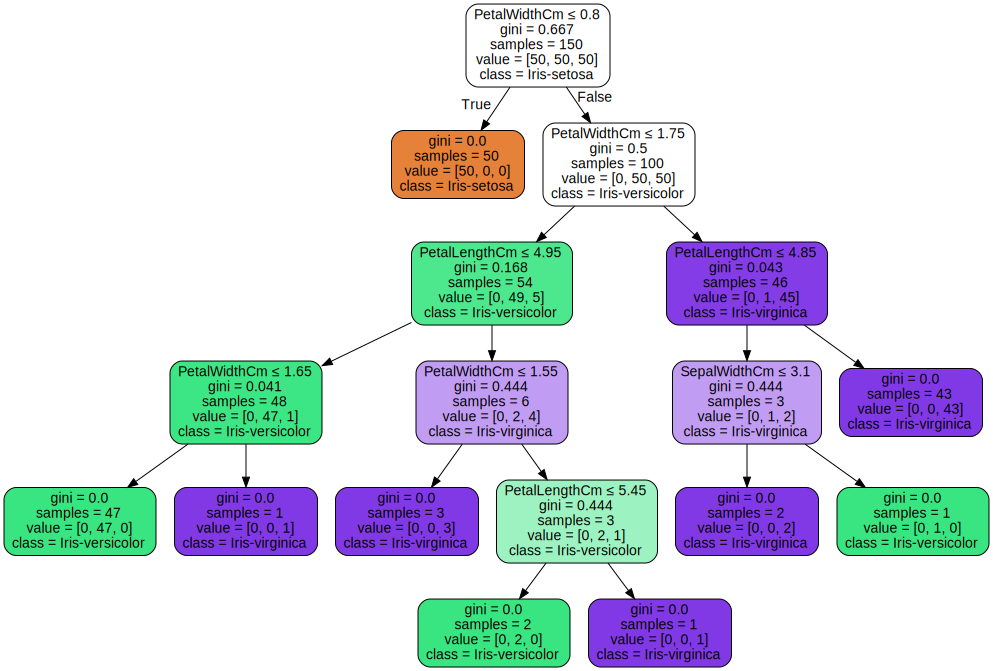

In [ ]:
dt_iris

In [ ]:
test_size = 0.2
seed = 10
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_size, random_state = seed)
decision_tree=DecisionTreeClassifier(max_depth = 2, random_state=0)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
decision_tree.score(X_train,y_train)

0.9583333333333334

In [ ]:
# The score method returns the accuracy of the model
decision_tree.score(X_test, y_test)

0.9333333333333333

### The test score is **93.3%** and the train score is **95.8%**.

### **CLASSIFICATION REPORT**

In [ ]:
# Predict
y_pred_dt= decision_tree.predict(X_test)

#Classification Report
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.85      0.92        13
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.93        30
weighted avg       0.95      0.93      0.93        30



### **CONFUSION MATRIX**

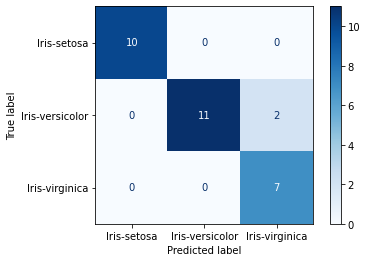

In [ ]:
disp = plot_confusion_matrix(decision_tree, X_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues)

The model is trained and ready to take any new data and it would classify the data into proper species setosa, vesicolor or virginica. 